In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('seaborn')
#create interaction by user file

In [2]:
# df = pd.read_csv('cascade_with_influence.csv')

# mm = df.merge(df, left_on='cascade',right_on='ID', suffixes=('_child', '_parent')) #find statistics on type to. How many percentage retweets

# def get_userwise_info(x):
#     aa = {}
#     x = x.sort_values('Time_child')
#     size = len(x)
    
#     one_per = x[:int(size * 0.01)]
#     aa['total_one'] = len(one_per)
#     aa['one_bots'] = sum(one_per['predicted_child'])
    
#     five_per = x[:int(size * 0.05)]
#     aa['total_five'] = len(five_per)
#     aa['five_bots'] = sum(five_per['predicted_child'])
    
#     fifteen_per = x[:int(size * 0.15)]
#     aa['total_fifteen'] = len(fifteen_per)
#     aa['fifteen_bots'] = sum(fifteen_per['predicted_child'])
    
#     twenty_five_per = x[:int(size * 0.25)]
#     aa['total_twenty_five'] = len(twenty_five_per)
#     aa['twenty_five_bots'] = sum(five_per['predicted_child'])
    
    
#     aa['total_retweeted'] = len(x)
#     aa['total_bots'] = sum(x['predicted_child'])
#     aa['predicted'] = x['predicted_parent'].iloc[0]
#     return pd.Series(aa)

# userwise_details = mm[['User_parent', 'predicted_child', 'predicted_parent', 'Time_child']].groupby('User_parent').apply(get_userwise_info)
# userwise_details = userwise_details.reset_index().rename(columns={'User_parent':'username'})

# def get_total_influence(df):
#     curr = {}
#     curr['total_tweets'] = len(df)
#     curr['total_influence'] = df['influence'].sum()
#     curr['predicted'] = df['predicted'].iloc[0]
             
#     return pd.Series(curr)

# userwise_influence = df[['User', 'influence', 'predicted']].groupby('User').apply(get_total_influence)
# userwise_influence = userwise_influence.reset_index().rename(columns={'User':'username'})

# userwise_influence.to_csv('data/userwise_influence.csv', index=None)
# userwise_details.to_csv('data/userwise_details.csv', index=None)

# combined = userwise_influence.merge(userwise_details[['username', 'total_bots', 'total_retweeted', 'one_bots', 'total_one','five_bots', 'total_five', 'fifteen_bots', 'total_fifteen', 'twenty_five_bots', 'total_twenty_five']], how='left', on='username')

# combined = combined.fillna(0)

# combined['total_humans'] = combined['total_retweeted'] - combined['total_bots']

# combined.to_csv('complete_userinfo.csv', index=None)

In [4]:
complete_userinfo  = pd.read_csv('complete_userinfo.csv')

In [5]:
complete_userinfo[complete_userinfo['username'] == 'realdonaldtrump']

,username,predicted,total_influence,total_tweets,total_bots,total_retweeted,one_bots,total_one,five_bots,total_five,fifteen_bots,total_fifteen,twenty_five_bots,total_twenty_five,total_humans
1048041,realdonaldtrump,0.0,239208.999283,97.0,33866.0,229072.0,369.0,2290.0,1709.0,11453.0,5138.0,34360.0,1709.0,57268.0,195206.0


In [6]:
total_retweeted = sum(complete_userinfo['total_retweeted'])

In [7]:
bots = complete_userinfo[complete_userinfo['predicted'] == 1]

In [8]:
humans = complete_userinfo[complete_userinfo['predicted'] == 0]

In [12]:
sum(bots['total_influence'])/sum(complete_userinfo['total_influence']) * 100

21.906128405799922

In [86]:
(sum(bots['total_bots']/total_retweeted)) * 100 #bots retweeted by bots

2.8730027683160015

In [87]:
sum(bots['total_bots'])

120231.0

In [88]:
(sum(bots['total_humans']/total_retweeted)) * 100 #bots retweeted by humans

6.341318874848061

In [89]:
sum(bots['total_humans'])

265375.0

In [90]:
(sum(humans['total_bots']/total_retweeted)) * 100 #humans retweeted by humans

9.140890186162123

In [91]:
sum(humans['total_bots'])

382533.0

In [92]:
(sum(humans['total_humans']/total_retweeted)) * 100 #bots retweeted by humans

81.64478817066482

In [93]:
sum(humans['total_humans'])

3416716.0

In [94]:
bots['human_percentage'] = (bots['total_humans']/bots['total_retweeted'])*100

/home/warproxxx/anaconda3/envs/meta_analyse/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [145]:
labels = ['0-10', '10-100', '100-500', '500-1k', '1k-3k', '3k-7k']
bots['interval'] = pd.cut(bots['total_retweeted'], [0, 10, 100, 500, 1000, 3000, 7000], labels=labels)

new_labels = ['0-10', '10-100', '100-500', '500-1k', '1k-3k', '3k-7k', '7k-30k', '>30k']
humans['interval'] = pd.cut(humans['total_retweeted'], [0, 10, 100, 500, 1000, 3000, 7000, 30000, 1000000], labels=new_labels)

/home/warproxxx/anaconda3/envs/meta_analyse/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/warproxxx/anaconda3/envs/meta_analyse/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [97]:
bots['interval'].value_counts()

0-10       7366
10-100     1968
100-500     482
500-1k       96
1k-3k        57
3k-7k         6
Name: interval, dtype: int64

In [109]:
humans['interval'].value_counts()

0-10       67454
10-100     12915
100-500     2017
500-1k       411
1k-3k        372
3k-7k        112
7k-30k        70
>30k           7
Name: interval, dtype: int64

In [113]:
def get_averages(df):
    ret = {}
    ret['human_average'] = df['total_humans'].mean()
    ret['bot_average'] = df['total_bots'].mean()
    
    greater = df[df['total_five'] > 0]
    greater['one_percentage'] = (greater['one_bots'] / greater['total_one']) * 100
    greater['five_percentage'] = (greater['five_bots'] / greater['total_five']) * 100
    greater['fifteen_percentage'] = (greater['fifteen_bots'] / greater['total_fifteen']) * 100
    greater['twenty_five_percentage'] = (greater['twenty_five_bots'] / greater['total_twenty_five']) * 100
    
    ret['one_bots_average'] = greater['one_percentage'].mean()
    ret['five_bots_average'] = greater['five_percentage'].mean()
    ret['fifteen_bots_average'] = greater['fifteen_percentage'].mean()
    ret['twenty_five_bots_average'] = greater['twenty_five_percentage'].mean()
    
    return pd.Series(ret)

bots_plot_info = bots.groupby('interval').apply(get_averages)
humans_plot_info = humans.groupby('interval').apply(get_averages)

In [114]:
bots_plot_info['bot_percentage'] = (bots_plot_info['bot_average'] / (bots_plot_info['bot_average'] + bots_plot_info['human_average'])) * 100
bots_plot_info['human_percentage'] = 100 - bots_plot_info['bot_percentage']

In [116]:
bots_plot_info

,bot_average,fifteen_bots_average,five_bots_average,human_average,one_bots_average,twenty_five_bots_average,bot_percentage,human_percentage
interval,,,,,,,,
0-10,1.707983,NaN,NaN,1.834781,NaN,NaN,48.210454,51.789546
10-100,11.863313,51.630267,78.289136,20.109248,83.333333,12.969373,37.104669,62.895331
100-500,72.900415,38.523577,44.753065,148.365145,78.786307,8.582068,32.947023,67.052977
500-1k,207.604167,33.515110,37.106784,504.718750,47.847636,7.326317,29.144670,70.855330
1k-3k,416.736842,29.592145,31.890843,1173.315789,39.362098,6.336524,26.208997,73.791003
3k-7k,913.500000,20.398652,21.098052,4240.166667,24.077097,4.217306,17.725244,82.274756


In [115]:
humans_plot_info['bot_percentage'] = (humans_plot_info['bot_average'] / (humans_plot_info['bot_average'] + humans_plot_info['human_average'])) * 100
humans_plot_info['human_percentage'] = 100 - humans_plot_info['bot_percentage']

In [121]:
h_plot = humans_plot_info[['one_bots_average', 'five_bots_average', 'fifteen_bots_average', 'twenty_five_bots_average', 'bot_percentage']]

In [122]:
b_plot = bots_plot_info[['one_bots_average', 'five_bots_average', 'fifteen_bots_average', 'twenty_five_bots_average', 'bot_percentage']]

In [130]:
plotting = h_plot.add_prefix('humans_').merge(b_plot.add_prefix('bots_'), on='interval', how='left').replace(np.nan, 0)

In [159]:
print(r1)
print(r2)
print(r3)
print(r4)

[0 1 2 3 4 5 6 7]
[0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2]
[0.6000000000000001, 1.5999999999999999, 2.6000000000000005, 3.6000000000000005, 4.6000000000000005, 5.6000000000000005, 6.6000000000000005, 7.6000000000000005]
[0.8, 1.7999999999999998, 2.8000000000000007, 3.8000000000000007, 4.800000000000001, 5.800000000000001, 6.800000000000001, 7.800000000000001]


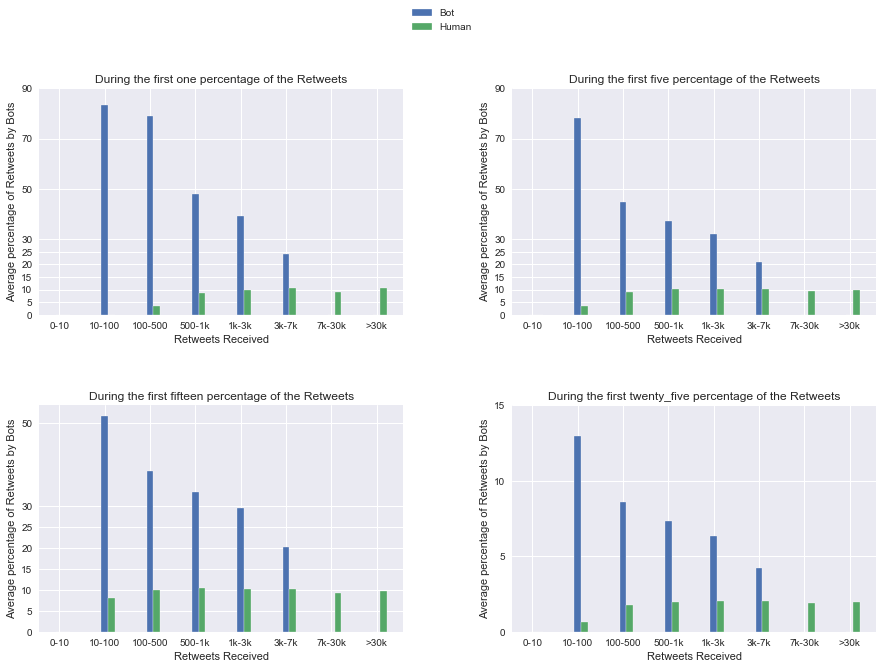

In [226]:
fig, axList = plt.subplots(2,2, figsize=(15,10))

width = 0.3
count = 0
percentages = ['one', 'five', 'fifteen', 'twenty_five']

for axs in axList:
    for ax in axs:
        
        ax.set_ylabel('Average percentage of Retweets by Bots')
        ax.set_xlabel('Retweets Received')
        ax.set_title('During the first {} percentage of the Retweets'.format(percentages[count]))
        
        bars1 = plotting['bots_{}_bots_average'.format(percentages[count])].values
        bars2 = plotting['humans_{}_bots_average'.format(percentages[count])].values

        r1 = np.arange(len(bars1)) * 2
        r2 = [x + width for x in r1]

        p1 = ax.bar(r1, bars1, width, edgecolor='white', label='Bots')
        p2 = ax.bar(r2, bars2, width, edgecolor='white', label='Humans')

        ax.set_xticks(r1)
        ax.set_xticklabels(new_labels)
        
        if count == 2:
            a = ax.set_yticks([0,5,10,15,20,25,30,50])
        elif count == 3:
            a = ax.set_yticks([0,5,10,15])
        else:
            a = ax.set_yticks([0,5,10,15,20,25,30,50,70,90])

        count += 1

fig.subplots_adjust(wspace=0.3, hspace = 0.4)
fig.legend((p1[0], p2[0]), ('Bot', 'Human'), loc=9)
fig.savefig('../../writeup/images/bot_humans_retweet_percentages.png') #maybe add 5, 15 an 25 bot averages too

In [ ]:
#create a chart for this too.Make one for humans too and then create a chart

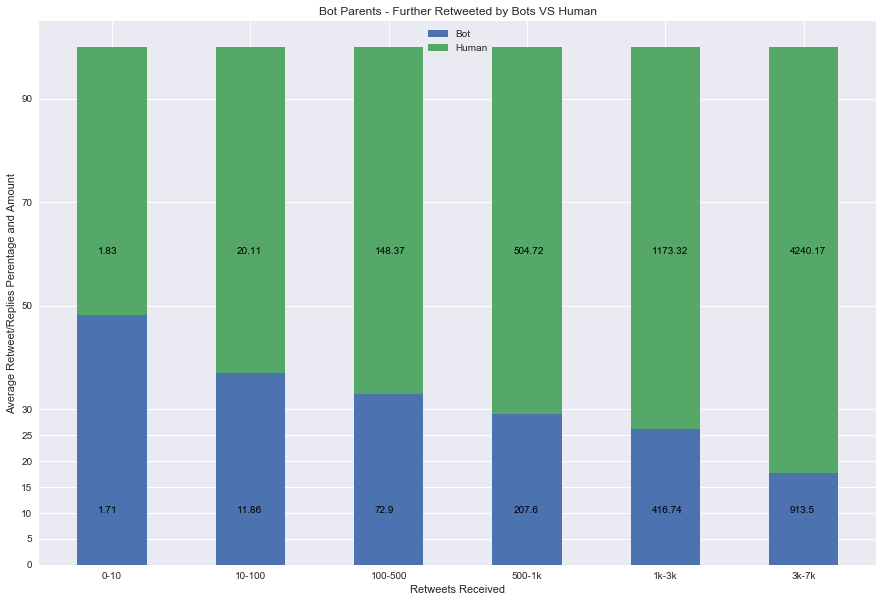

In [233]:
width = 0.5

curr_bots = bots_plot_info['bot_percentage'].values
curr_humans = bots_plot_info['human_percentage'].values
idx = np.arange(len(curr_humans))


fig, ax = plt.subplots(figsize=(15,10))


p1 = ax.bar(idx, curr_bots, width)
p2 = ax.bar(idx, curr_humans, width, bottom=curr_bots)
ax.set_ylabel('Average Retweet/Replies Perentage and Amount')
ax.set_xlabel('Retweets Received')
ax.set_title('Bot Parents - Further Retweeted by Bots VS Human')
ax.set_xticks(idx)
ax.set_xticklabels(labels)
ax.set_yticks([0,5,10,15,20,25,30,50,70,90])


for j, i in enumerate(np.arange(-0.1, 5.9, 1)):
    ax.text(i, 60, round(bots_plot_info.iloc[j]['human_average'], 2), color='black')
    ax.text(i, 10, round(bots_plot_info.iloc[j]['bot_average'], 2), color='black')

ax.legend((p1[0], p2[0]), ('Bot', 'Human'), loc=9)
fig.savefig('../../writeup/images/bots_furtherretweeted.png')

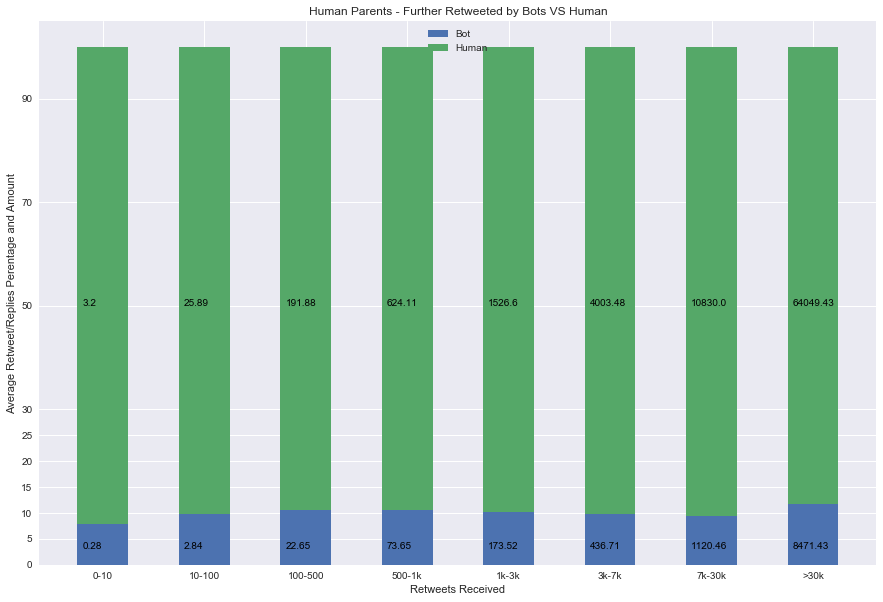

In [237]:
width = 0.5

curr_bots = humans_plot_info['bot_percentage'].values
curr_humans = humans_plot_info['human_percentage'].values
idx = np.arange(len(curr_humans))


fig, ax = plt.subplots(figsize=(15,10))


p1 = ax.bar(idx, curr_bots, width)
p2 = ax.bar(idx, curr_humans, width, bottom=curr_bots)
ax.set_ylabel('Average Retweet/Replies Perentage and Amount')
ax.set_xlabel('Retweets Received')
ax.set_title('Human Parents - Further Retweeted by Bots VS Human')
ax.set_xticks(idx)
ax.set_xticklabels(new_labels)
ax.set_yticks([0,5,10,15,20,25,30,50,70,90])


for j, i in enumerate(np.arange(-0.2, 7.8, 1)):
    ax.text(i, 50, round(humans_plot_info.iloc[j]['human_average'], 2), color='black')
    ax.text(i, 3, round(humans_plot_info.iloc[j]['bot_average'], 2), color='black')

ax.legend((p1[0], p2[0]), ('Bot', 'Human'), loc=9)
fig.savefig('../../writeup/images/humans_furtherretweeted.png')